In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import BoundaryLayerToolbox as blt
%matplotlib inline

In [2]:
cca_lat, cca_long = 19.326180, -99.175842

### TO DO LIST
1. Analizar solo la estación CCA
2. Revisar la PBLH con los datos de los modelos que te da daniel para 24 y 48 
3. Escribir sobre el modelo y porque falla el metodo de Ri

# 1. Estacion CCA
sin datos del ceilometro, aun no puedo hacer nada.

In [105]:
ceil_01_17 = np.loadtxt('2015-01-17.dat')
ceil_01_18 = np.loadtxt('2015-01-18.dat')

In [70]:
ceil_01_17

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.07000000e+03],
       [  0.00000000e+00,   1.00000000e+01,   0.00000000e+00,
          2.07000000e+03],
       [  0.00000000e+00,   2.00000000e+01,   0.00000000e+00,
          2.06000000e+03],
       [  0.00000000e+00,   3.00000000e+01,   0.00000000e+00,
          2.05000000e+03],
       [  0.00000000e+00,   4.00000000e+01,   0.00000000e+00,
          2.04000000e+03],
       [  0.00000000e+00,   5.00000000e+01,   0.00000000e+00,
          2.03000000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.02000000e+03],
       [  1.00000000e+00,   1.00000000e+01,   0.00000000e+00,
          1.90000000e+03],
       [  1.00000000e+00,   2.00000000e+01,   0.00000000e+00,
          1.90000000e+03],
       [  1.00000000e+00,   3.00000000e+01,   0.00000000e+00,
          1.99000000e+03],
       [  1.00000000e+00,   4.00000000e+01,   0.00000000e+00,
          1.98000000e+03],
       [  1.00000000e

In [71]:
ceil_01_17[:,0] = ceil_01_17[:,0] + ceil_01_17[:,1]/60

In [106]:
ceil_01_18[:,0] = ceil_01_18[:,0] + ceil_01_18[:,1]/60

In [72]:
ceil_01_17[:,3].shape

(144,)

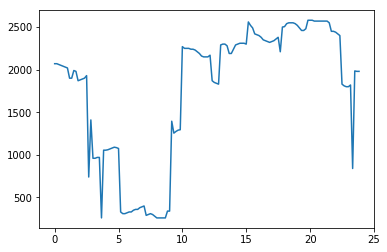

In [73]:
plt.plot(ceil_01_17[:,0], ceil_01_17[:,3])

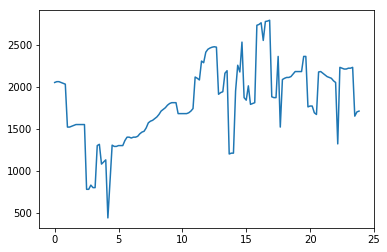

In [107]:
plt.plot(ceil_01_18[:,0], ceil_01_18[:,3])

In [86]:
print(ceil_01_17[0, -1:0])

[]


In [78]:
ceil_01_17[1,0]%1 == 0.0

False

In [93]:
print(np.zeros(shape=(24,2)))

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [95]:
ceil_01_17_h = np.zeros(shape=(24,2))
c = 0
for i in range(0, len(ceil_01_17[:, 0])):
    if ceil_01_17[i,0]%1 == 0.0:
        ceil_01_17_h[c,0] = ceil_01_17[i,0]
        ceil_01_17_h[c,1] = ceil_01_17[i,3]
        c += 1

In [108]:
ceil_01_18_h = np.zeros(shape=(24,2))
c = 0
for i in range(0, len(ceil_01_18[:, 0])):
    if ceil_01_18[i,0]%1 == 0.0:
        ceil_01_18_h[c,0] = ceil_01_18[i,0]
        ceil_01_18_h[c,1] = ceil_01_18[i,3]
        c += 1

In [109]:
ceil_01_18_h

array([[  0.00000000e+00,   2.05000000e+03],
       [  1.00000000e+00,   1.52000000e+03],
       [  2.00000000e+00,   1.55000000e+03],
       [  3.00000000e+00,   8.00000000e+02],
       [  4.00000000e+00,   1.13000000e+03],
       [  5.00000000e+00,   1.30000000e+03],
       [  6.00000000e+00,   1.39000000e+03],
       [  7.00000000e+00,   1.47000000e+03],
       [  8.00000000e+00,   1.64000000e+03],
       [  9.00000000e+00,   1.80000000e+03],
       [  1.00000000e+01,   1.68000000e+03],
       [  1.10000000e+01,   2.11500000e+03],
       [  1.20000000e+01,   2.44500000e+03],
       [  1.30000000e+01,   1.93000000e+03],
       [  1.40000000e+01,   1.21000000e+03],
       [  1.50000000e+01,   1.84000000e+03],
       [  1.60000000e+01,   2.74000000e+03],
       [  1.70000000e+01,   1.88000000e+03],
       [  1.80000000e+01,   2.10000000e+03],
       [  1.90000000e+01,   2.18000000e+03],
       [  2.00000000e+01,   1.77000000e+03],
       [  2.10000000e+01,   2.16000000e+03],
       [  

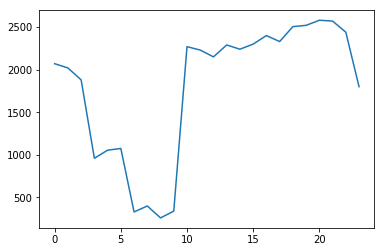

In [97]:
plt.plot(ceil_01_17_h[:,0], ceil_01_17_h[:,1])

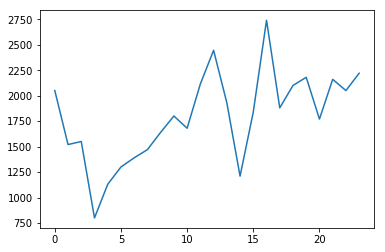

In [110]:
plt.plot(ceil_01_18_h[:,0], ceil_01_18_h[:,1])

----

In [162]:
ceil_24 = np.loadtxt('2015-01-17_24_UTC.dat')
ceil_48 = np.loadtxt('2015-01-17_48_UTC.dat')

In [163]:
ceil_24[:,0] = ceil_24[:,0] + ceil_24[:,1]/60

In [164]:
ceil_48[:,0] = ceil_48[:,0] + ceil_48[:,1]/60

In [168]:
ceil_24_h = np.zeros(shape=(24,2))
c = 0
for i in range(0, len(ceil_24[:, 0])):
    if ceil_24[i,0]%1 == 0.0:
        print(c)
        ceil_24_h[c,0] = c
        ceil_24_h[c,1] = ceil_24[i,3]
        c += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [169]:
ceil_48_h = np.zeros(shape=(24,2))
c = 0
for i in range(0, len(ceil_48[:, 0])):
    if ceil_48[i,0]%1 == 0.0:
        print(c)
        ceil_48_h[c,0] = c
        ceil_48_h[c,1] = ceil_48[i,3]
        c += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


IndexError: index 24 is out of bounds for axis 0 with size 24

In [171]:
ceil_48_h

array([[  0.00000000e+00,   2.50500000e+03],
       [  1.00000000e+00,   2.52000000e+03],
       [  2.00000000e+00,   2.58000000e+03],
       [  3.00000000e+00,   2.57000000e+03],
       [  4.00000000e+00,   2.44000000e+03],
       [  5.00000000e+00,   1.80000000e+03],
       [  6.00000000e+00,   2.05000000e+03],
       [  7.00000000e+00,   1.52000000e+03],
       [  8.00000000e+00,   1.55000000e+03],
       [  9.00000000e+00,   8.00000000e+02],
       [  1.00000000e+01,   1.13000000e+03],
       [  1.10000000e+01,   1.30000000e+03],
       [  1.20000000e+01,   1.39000000e+03],
       [  1.30000000e+01,   1.47000000e+03],
       [  1.40000000e+01,   1.64000000e+03],
       [  1.50000000e+01,   1.80000000e+03],
       [  1.60000000e+01,   1.68000000e+03],
       [  1.70000000e+01,   2.11500000e+03],
       [  1.80000000e+01,   2.44500000e+03],
       [  1.90000000e+01,   1.93000000e+03],
       [  2.00000000e+01,   1.21000000e+03],
       [  2.10000000e+01,   1.84000000e+03],
       [  

# 2. PBLH 24h y 48h
puedo extraer unos datos, pero aun no tengo datos del ceilometro

## Enero 17 2015

In [3]:
file_01_17_24 = Dataset('24_wrfout_d02_2015-01-17_00.nc', 'r')

Ya que estoy trabajando en la malla d02 y esta no cambia, basta con definirla una sola vez

In [4]:
relieve = file_01_17_24.variables['HGT']

xlat = file_01_17_24.variables['XLAT']
xlong = file_01_17_24.variables['XLONG']

xlat_u = file_01_17_24.variables['XLAT_U']
xlong_u = file_01_17_24.variables['XLONG_U']

xlat_v = file_01_17_24.variables['XLAT_V']
xlong_v = file_01_17_24.variables['XLONG_V']

cca_nx, cca_ny = blt.near_coord(xlong, xlat, cca_long, cca_lat)

In [5]:
file_01_17_48 = Dataset('48_wrfout_d02_2015-01-17_00.nc', 'r')

In [6]:
pblh_01_17_24 = file_01_17_24.variables['PBLH']
T_01_17_24 = file_01_17_24.variables['T']
T2_01_17_24 = file_01_17_24.variables['T2']
u_01_17_24 = file_01_17_24.variables['U']
v_01_17_24 = file_01_17_24.variables['V']
PH_01_17_24 = file_01_17_24.variables['PH']
PHB_01_17_24 = file_01_17_24.variables['PHB']
pblh_01_17_24_cca = pblh_01_17_24[:, cca_nx, cca_ny] 

In [7]:
pblh_01_17_48 = file_01_17_48.variables['PBLH']
T_01_17_48 = file_01_17_48.variables['T']
T2_01_17_48 = file_01_17_48.variables['T2']
u_01_17_48 = file_01_17_48.variables['U']
v_01_17_48 = file_01_17_48.variables['V']
PH_01_17_48 = file_01_17_48.variables['PH']
PHB_01_17_48 = file_01_17_48.variables['PHB']
pblh_01_17_48_cca = pblh_01_17_48[:, cca_nx, cca_ny] 

In [8]:
t_range_24 = range(0, len(pblh_01_17_24))
t_range_48 = range(len(pblh_01_17_24), 48)

In [101]:
len(ceil_01_17_h)

24

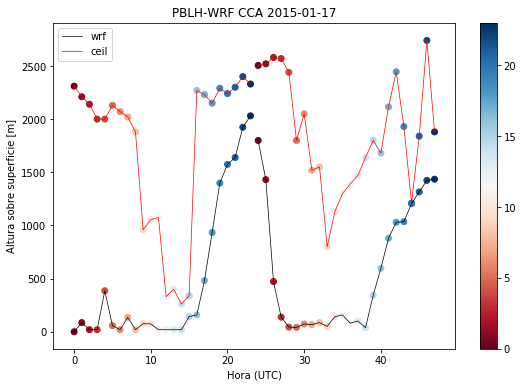

In [172]:
plt.figure(figsize=(9,6))
plt.plot(t_range_24, pblh_01_17_24_cca, 'k', linewidth=0.7, label='wrf')
plt.scatter(t_range_24, pblh_01_17_24_cca, c= t_range_24, cmap='RdBu')
plt.plot(t_range_48, pblh_01_17_48_cca, 'k', linewidth=0.7)
plt.scatter(t_range_48, pblh_01_17_48_cca, c = t_range_24, cmap='RdBu')
plt.plot(ceil_24_h[:,0], ceil_24_h[:,1], 'r', linewidth=0.7)
plt.scatter(ceil_24_h[:,0], ceil_24_h[:,1], c = t_range_24, cmap='RdBu')
plt.plot(t_range_48, ceil_48_h[:,1], 'r', linewidth=0.7, label='ceil')
plt.scatter(t_range_48, ceil_48_h[:,1], c = t_range_24, cmap='RdBu')
plt.ylabel("Altura sobre superficie [m]")
plt.xlabel('Hora (UTC)')
plt.title('PBLH-WRF CCA 2015-01-17')
plt.colorbar()
plt.legend()

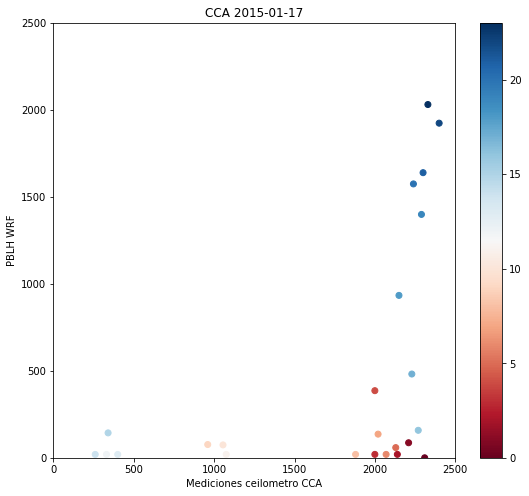

In [174]:
plt.figure(figsize=(9,8))
plt.scatter(ceil_24_h[:,1], pblh_01_17_24_cca, c= t_range_24, cmap='RdBu')
plt.ylim(0,2500)
plt.xlim(0,2500)
plt.ylabel("PBLH WRF")
plt.xlabel('Mediciones ceilómetro CCA')
plt.title('CCA 2015-01-17')
plt.colorbar()


In [130]:
import scipy.optimize as opt

In [131]:
def ajuste_lineal(x,a,b):
    return a + b*x

In [175]:
popt, pcov = opt.curve_fit(ajuste_lineal, ceil_24_h[:,1], pblh_01_17_24_cca)

In [179]:
ajuste_lineal(ceil_24_h[:,1], *popt)

array([ 723.14763231,  679.7436279 ,  649.36082481,  588.59521864,
        588.59521864,  645.02042437,  618.97802172,  597.27601952,
        536.51041334,  137.19357276,  178.42737695,  187.10817783,
       -136.25165504, -105.86885195, -166.63445812, -131.9112546 ,
        705.78603055,  688.42442878,  653.70122525,  714.46683143,
        692.76482922,  718.80723187,  762.21123628,  731.82843319])

In [185]:
fit_leg = str(popt[1]) + ' x ' + str(popt[0])

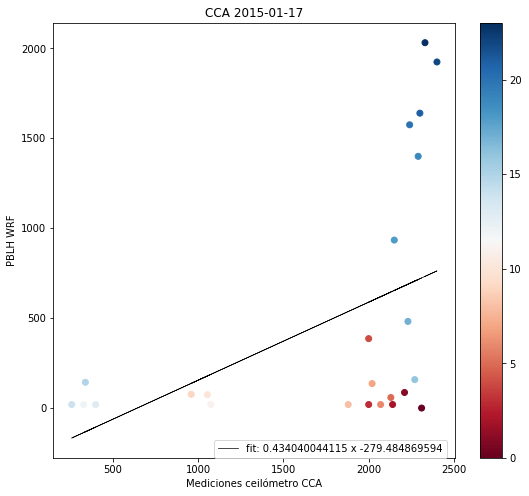

In [189]:
plt.figure(figsize=(9,8))
plt.scatter(ceil_24_h[:,1], pblh_01_17_24_cca, c= t_range_24, cmap='RdBu')
plt.plot(ceil_24_h[:,1], ajuste_lineal(ceil_24_h[:,1], *popt), 'k', label = 'fit: ' + fit_leg, linewidth=0.7)
#plt.ylim(0,2500)
#plt.xlim(0,2500)
plt.ylabel("PBLH WRF")
plt.xlabel('Mediciones ceilómetro CCA')
plt.title('CCA 2015-01-17')
plt.colorbar()
plt.legend(loc = (0.4, 0))

----

In [194]:
file_06_10_24 = Dataset('48_wrfout_d02_2015-01-17_00.nc', 'r')

In [195]:
file_06_10_48 = Dataset('48_wrfout_d02_2015-06-10_00.nc', 'r')

In [196]:
pblh_06_10_24 = file_06_10_24.variables['PBLH']
T_06_10_24 = file_06_10_24.variables['T']
T2_06_10_24 = file_06_10_24.variables['T2']
u_06_10_24 = file_06_10_24.variables['U']
v_06_10_24 = file_06_10_24.variables['V']
PH_06_10_24 = file_06_10_24.variables['PH']
PHB_06_10_24 = file_06_10_24.variables['PHB']
pblh_06_10_24_cca = pblh_06_10_24[:, cca_nx, cca_ny] 

In [197]:
pblh_06_10_48 = file_06_10_48.variables['PBLH']
T_06_10_48 = file_06_10_48.variables['T']
T2_06_10_48 = file_06_10_48.variables['T2']
u_06_10_48 = file_06_10_48.variables['U']
v_06_10_48 = file_06_10_48.variables['V']
PH_06_10_48 = file_06_10_48.variables['PH']
PHB_06_10_48 = file_06_10_48.variables['PHB']
pblh_06_10_48_cca = pblh_06_10_48[:, cca_nx, cca_ny] 

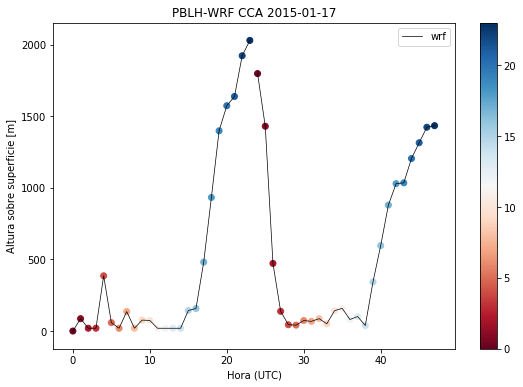

In [198]:
plt.figure(figsize=(9,6))
plt.plot(t_range_24, pblh_01_17_24_cca, 'k', linewidth=0.7, label='wrf')
plt.scatter(t_range_24, pblh_01_17_24_cca, c= t_range_24, cmap='RdBu')
plt.plot(t_range_48, pblh_01_17_48_cca, 'k', linewidth=0.7)
plt.scatter(t_range_48, pblh_01_17_48_cca, c = t_range_24, cmap='RdBu')
plt.ylabel("Altura sobre superficie [m]")
plt.xlabel('Hora (UTC)')
plt.title('PBLH-WRF CCA 2015-01-17')
plt.colorbar()
plt.legend()